#Import Liabrary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from mlxtend.frequent_patterns import association_rules,apriori
import warnings
warnings.filterwarnings('ignore')


# Import Dataset

In [2]:
my_movies=pd.read_csv('/content/my_movies.csv')
my_movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
movie_data= my_movies.iloc[:,5:]
movie_data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


#Data Understanding

In [4]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [5]:
movie_data.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
movie_data.isna().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [7]:
movie_data.corr()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


In [8]:
count=movie_data.loc[:,:].sum()
count

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

#Exploratory Data Analysis (EDA)

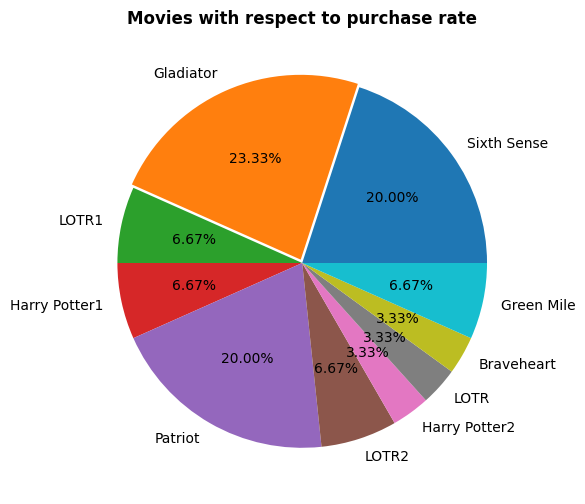

In [9]:
plt.figure(figsize=(8,6))
plt.pie(movie_data.sum(),labels=movie_data.columns,
        explode=[0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct='%.2f%%',textprops={'size':10})
plt.title("Movies with respect to purchase rate", fontweight='bold')
plt.show()

#Top 10 Populer items

In [10]:
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


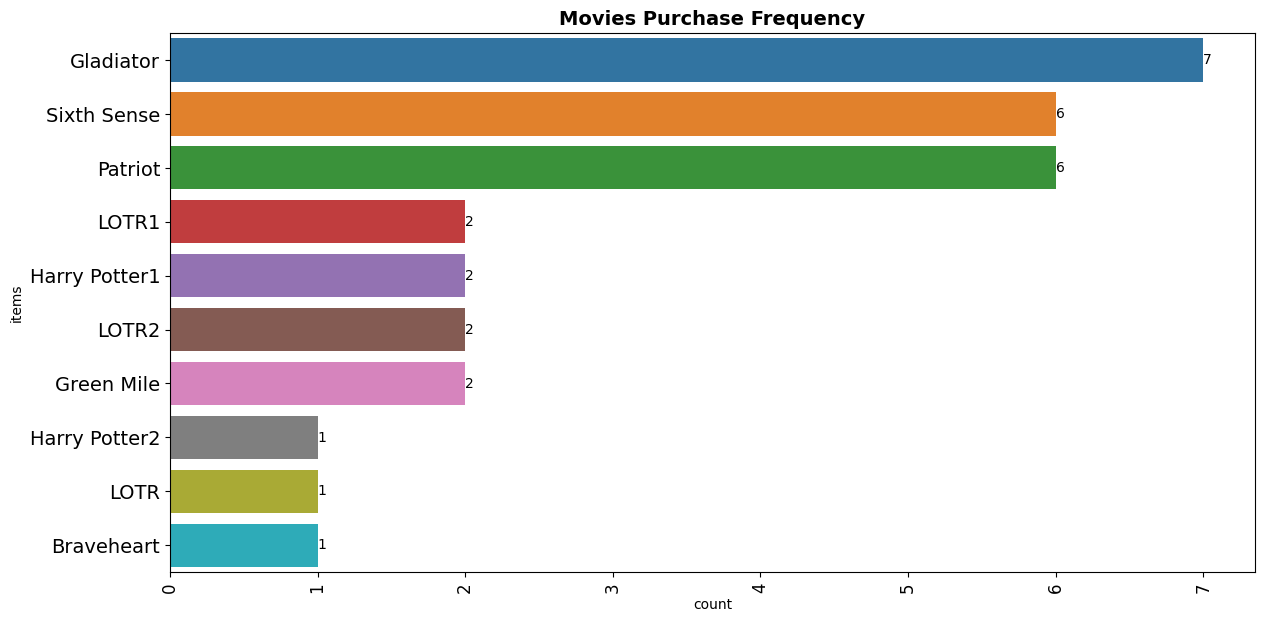

In [11]:
plt.figure(figsize=(14,7))
ax=sns.barplot(x='count',y='items',data=count)
plt.yticks(rotation=0,fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.title('Movies Purchase Frequency',fontsize=14, fontweight='bold')
for i in ax.containers:
  ax.bar_label(i,)


**Observations:**

Most Frequent Saw the Movies are : Gladiator and Sixth Sense

 ### Support and Length

####If we divide all items with row number, we can find Support value. Our threshold value is 0.2 for Support value.

In [12]:
# Product Frequency / Total Sales
first=pd.DataFrame(movie_data.sum()/movie_data.shape[0],columns=["Support"]).sort_values("Support",ascending=False)
first

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [13]:
# Elimination by Support Value
first[first.Support >= 0.1]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [14]:
first[first.Support>=0.15]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


In [15]:
first[first.Support>=0.20]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


###Second Iteration: Find support values for pair product combinations

In [16]:
second=list(itertools.combinations(first.index,2))
second = [list(i) for i in second]

second[:10] # Sample of combinations

[['Gladiator', 'Sixth Sense'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'LOTR1'],
 ['Gladiator', 'Harry Potter1'],
 ['Gladiator', 'LOTR2'],
 ['Gladiator', 'Green Mile'],
 ['Gladiator', 'Harry Potter2'],
 ['Gladiator', 'LOTR'],
 ['Gladiator', 'Braveheart'],
 ['Sixth Sense', 'Patriot']]

####Finding support values

In [17]:
value=[]
for i in range(0,len(second)):
  temp=movie_data.T.loc[second[i]].sum()
  temp = len(temp[temp == movie_data.T.loc[second[i]].shape[0]]) / movie_data.shape[0]
  value.append(temp)

# Create a DataFrame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration


,Support,length
index,,
"(Gladiator, Patriot)",0.6,2
"(Gladiator, Sixth Sense)",0.5,2
"(Sixth Sense, Patriot)",0.4,2
"(Sixth Sense, Green Mile)",0.2,2
"(LOTR1, LOTR2)",0.2,2


In [18]:
second=list(itertools.combinations(first.index,3))
second=[list(i) for i in second]
second[:10]  # Sample of Combination

[['Gladiator', 'Sixth Sense', 'Patriot'],
 ['Gladiator', 'Sixth Sense', 'LOTR1'],
 ['Gladiator', 'Sixth Sense', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'Green Mile'],
 ['Gladiator', 'Sixth Sense', 'Harry Potter2'],
 ['Gladiator', 'Sixth Sense', 'LOTR'],
 ['Gladiator', 'Sixth Sense', 'Braveheart'],
 ['Gladiator', 'Patriot', 'LOTR1'],
 ['Gladiator', 'Patriot', 'Harry Potter1']]

In [19]:
value = []
for i in range(0, len(second)):
    temp = movie_data.T.loc[second[i]].sum()
    temp = len(temp[temp == movie_data.T.loc[second[i]].shape[0]]) / movie_data.shape[0]
    value.append(temp)

# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(Gladiator, Sixth Sense, Patriot)",0.4,3


In [20]:
second = list(itertools.combinations(first.index, 4))
second = [list(i) for i in second]

second[:10] # Sample of combinations

[['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR1'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Green Mile'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Harry Potter2'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Braveheart'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'Green Mile']]

In [21]:
value = []
for i in range(0, len(second)):
    temp = movie_data.T.loc[second[i]].sum()
    temp = len(temp[temp == movie_data.T.loc[second[i]].shape[0]]) / movie_data.shape[0]
    value.append(temp)

# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,


#Association Rules
##There are two main functions here.

* apriori() function evaluate support value for each product.

* association_rules() function help us to understand relationship between antecedents and consequences products. It gives some remarkable information about products.

##Association rules with 10% Support and 30% confidence
###With 10% Support

In [24]:
frequent_itemset1=apriori(movie_data,min_support=0.1,use_colnames=True)
frequent_itemset1['length']=frequent_itemset1['itemsets'].apply(lambda  x: len(x))
frequent_itemset1

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


###Support value gives us these information:
###Head 5

* 60 percent of 100 purchases are Sixth Sense
* 70 percent of 100 purchases are Gladiator
* 20 percent of 100 purchases are LOTR1
* 20 percent of 100 purchases are Harry Potter
* 60 percent of 100 purchases are Patriot
###Tail 5

* 10 percent of 100 purchases are Green Mile, LOTR1, Harry Potter1, Sixth Sense
* 10 percent of 100 purchases are Green Mile, LOTR2, LOTR1, Sixth Sense
* 10 percent of 100 purchases are Green Mile, LOTR2, Harry Potter1, Sixth Sense
* 10 percent of 100 purchases are Green Mile, LOTR2, LOTR1, Harry Potter1
* 10 percent of 100 purchases are Sixth Sense, LOTR2, Harry Potter1, Green Mile, LOTR1

#With 30% Confidence

In [26]:
rules1=association_rules(frequent_itemset1,metric='confidence',min_threshold=0.3)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
212,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(LOTR1),"(Harry Potter1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
215,(Green Mile),"(LOTR1, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


* Antecedent support variable tells us probability of antecedent products alone

* Consequents support variable tells us probability of consequents products alone

* The support value is the value of the two products (Antecedents and Consequents)

* Confidence is an indication of how often the rule has been found to be true.

* The ratio of the observed support to that expected if X and Y were
independent.

* A leverage value of 0 indicates independence. Range will be [-1 1]

* A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [30]:
rules1.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
183,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
127,"(LOTR1, Sixth Sense)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
156,"(Sixth Sense, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
157,"(Green Mile, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
119,"(Green Mile, Gladiator)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
6,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8
14,(Green Mile),(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6


##Lift Ratio > 1 is a good influential rule in selecting the associated transactions

In [32]:
lift1=rules1[rules1.lift>1]
lift1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
212,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(LOTR1),"(Harry Potter1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
215,(Green Mile),"(LOTR1, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


##Visualization of obtained rule

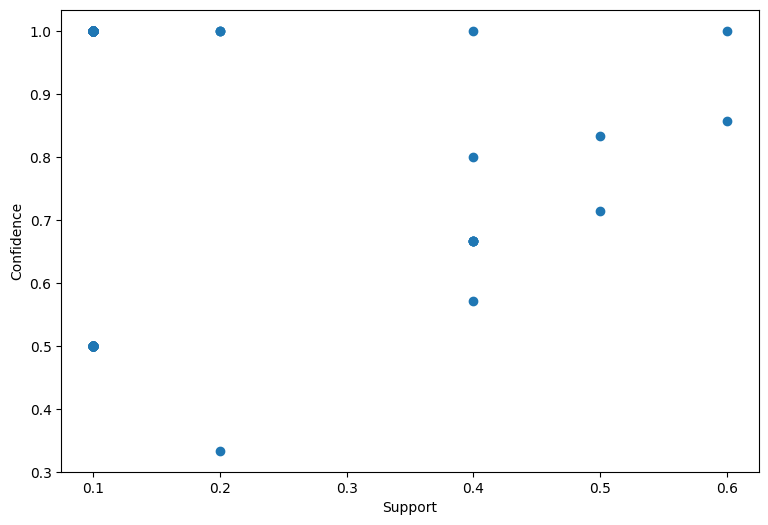

In [33]:
plt.figure(figsize=(9,6))
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [37]:
matrix1=lift1.pivot('antecedents','consequents','lift')
matrix1

consequents,(Gladiator),"(Harry Potter1, Green Mile)","(LOTR1, Green Mile)","(Green Mile, LOTR2)","(Sixth Sense, Gladiator, Green Mile)","(Gladiator, LOTR, Sixth Sense)","(Harry Potter1, Sixth Sense, LOTR2)","(LOTR1, Harry Potter1, Sixth Sense)","(Harry Potter1, Sixth Sense, Green Mile)","(LOTR1, Sixth Sense, Green Mile)",...,"(Sixth Sense, Patriot)","(Sixth Sense, Gladiator)","(Harry Potter1, Sixth Sense)","(LOTR1, Sixth Sense)","(Sixth Sense, LOTR2)","(Sixth Sense, Green Mile)","(LOTR, Sixth Sense)","(LOTR1, Harry Potter1, Sixth Sense, LOTR2)","(LOTR, Gladiator)","(LOTR1, Harry Potter1, Sixth Sense, Green Mile)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(Sixth Sense),1.190476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR, Green Mile)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Braveheart)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR1, LOTR2)",NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,5.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN
"(Gladiator, LOTR, Sixth Sense)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR, Sixth Sense, Green Mile)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(Harry Potter1),NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,5.0,5.0,2.5,NaN,NaN,NaN,NaN
"(LOTR, Gladiator, Green Mile)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


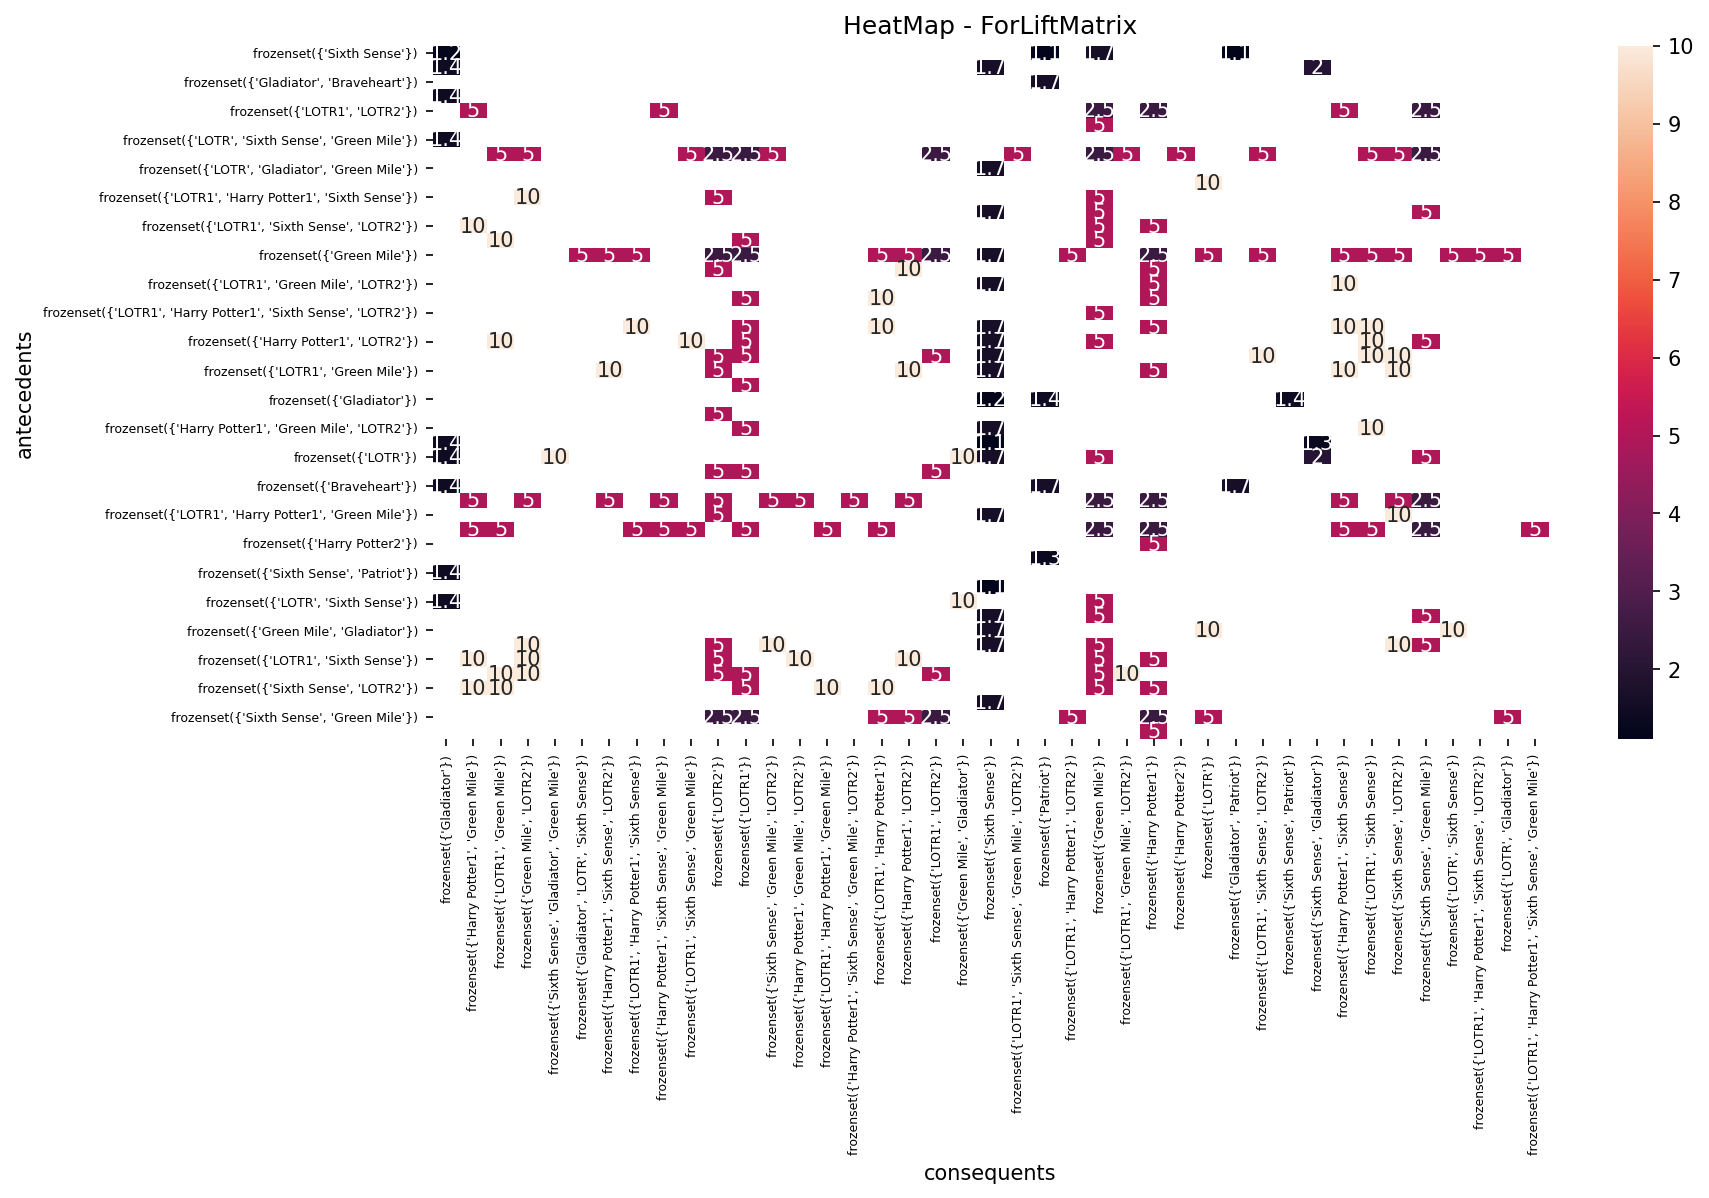

In [38]:
plt.figure(figsize=(12,6),dpi=150)
sns.heatmap(matrix1,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0, fontsize= 6)
plt.xticks(rotation=90, fontsize= 6)
plt.show()

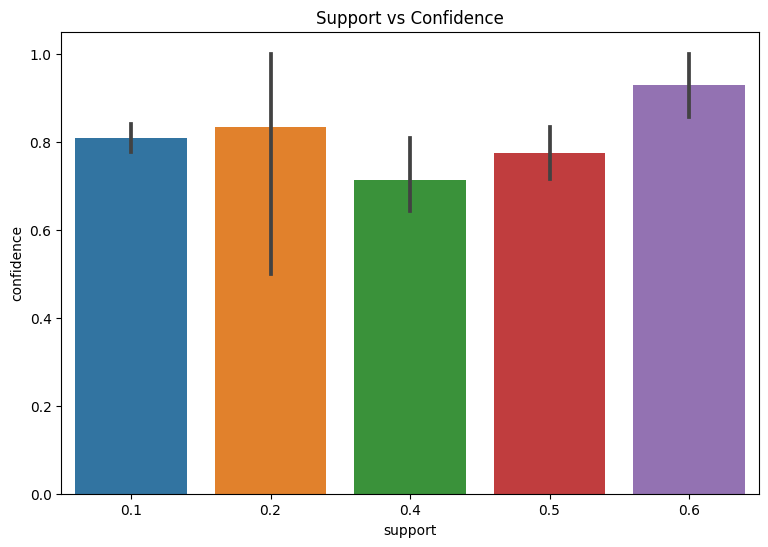

In [40]:
plt.figure(figsize=(9,6))
sns.barplot(x="support",y="confidence",data=lift1)
plt.title("Support vs Confidence")
plt.show()

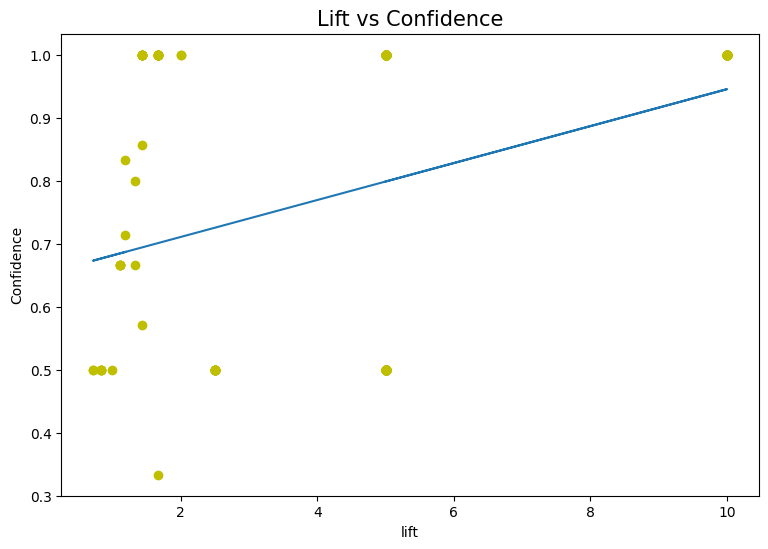

In [52]:
plt.figure(figsize=(9,6))
fit=np.polyfit(rules1['lift'],rules1['confidence'],1)
fit_fn=np.poly1d(fit)
plt.plot(rules1['lift'],rules1['confidence'],'yo',rules1['lift'],fit_fn(rules1['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence',fontsize=15)
plt.show()

##Association rules with 15% Support and 40% confidence

##With 15% Support

In [57]:
frequent_itemset2=apriori(movie_data,min_support=0.15, use_colnames=True)
frequent_itemset2['length']=frequent_itemset2['itemsets'].apply(lambda x: len(x))
frequent_itemset2

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


##@Support value gives us these information:
###Head 5

* 42 percent of 100 purchases are Sixth Sense
* 24 percent of 100 purchases are Gladiator
* 43 percent of 100 purchases are LOTR1
* 28 percent of 100 purchases are Harry Potter1
* 21 percent of 100 purchases are Patriot

#With 40% Confidence

In [58]:
rules2=association_rules(frequent_itemset2,metric='confidence',min_threshold=0.4)
rules2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


* Antecedent support variable tells us probability of antecedent products alone
* Consequents support variable tells us probability of consequents products alone
* The support value is the value of the two products (Antecedents and Consequents)
* Confidence is an indication of how often the rule has been found to be true.
* The ratio of the observed support to that expected if X and Y were independent.
* A leverage value of 0 indicates independence. Range will be [-1 1]
* A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [59]:
rules2.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
10,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
14,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8


##Lift Ratio > 1 is a good influential rule in selecting the associated transactions

In [60]:
lift2=rules2[rules2.lift>1]
lift2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


#Visualization of obtained rule

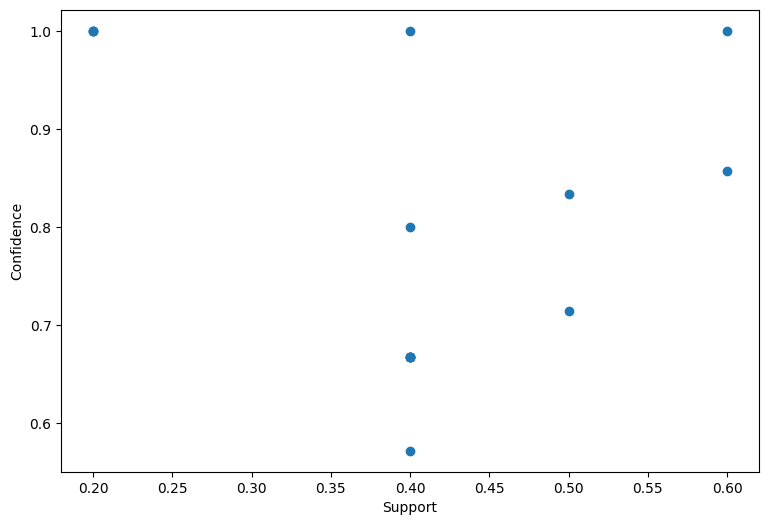

In [61]:
plt.figure(figsize=(9,6))
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [62]:
matrix2 = lift2.pivot('antecedents','consequents','lift')
matrix2

consequents,(Gladiator),(Sixth Sense),(Patriot),(LOTR2),(LOTR1),"(Gladiator, Patriot)","(Sixth Sense, Patriot)","(Sixth Sense, Gladiator)"
antecedents,,,,,,,,
(Sixth Sense),1.190476,NaN,1.111111,NaN,NaN,1.111111,NaN,NaN
(Gladiator),NaN,1.190476,1.428571,NaN,NaN,NaN,1.428571,NaN
(Patriot),1.428571,1.111111,NaN,NaN,NaN,NaN,NaN,1.333333
(Green Mile),NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
"(Sixth Sense, Gladiator)",NaN,NaN,1.333333,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Patriot)",NaN,1.111111,NaN,NaN,NaN,NaN,NaN,NaN


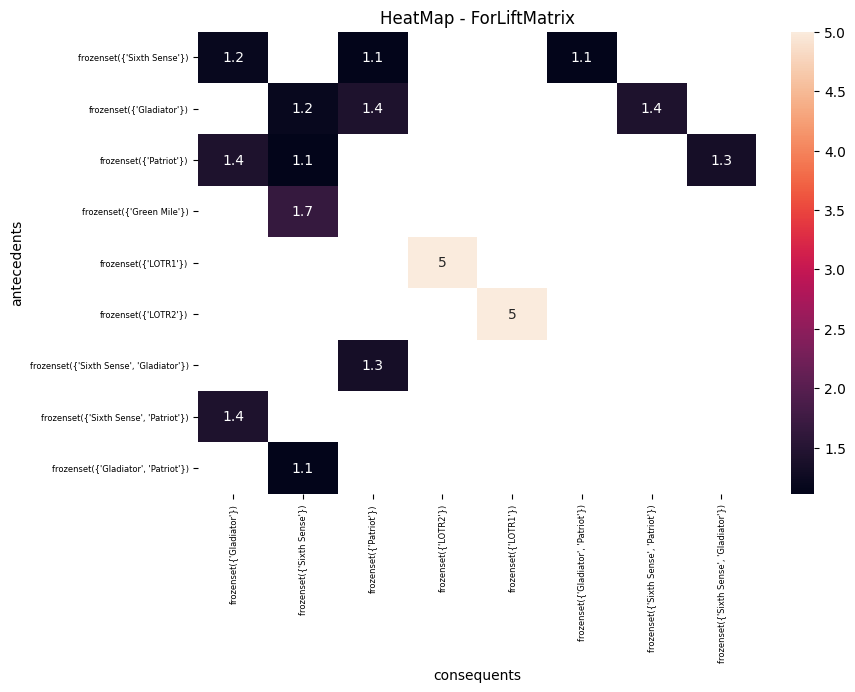

In [63]:
plt.figure(figsize=(9,6),dpi=100)
sns.heatmap(matrix2,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0, fontsize= 6)
plt.xticks(rotation=90, fontsize= 6)
plt.show()

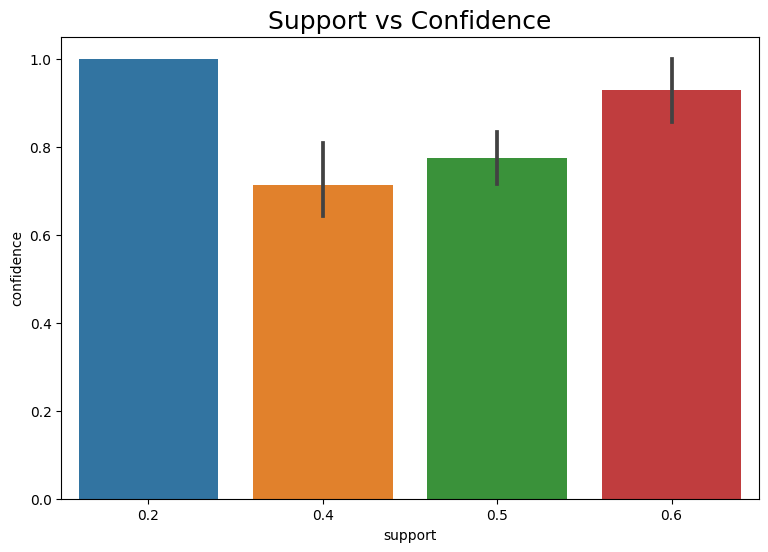

In [65]:
plt.figure(figsize=(9,6))
sns.barplot(x="support",y="confidence",data=lift2)
plt.title("Support vs Confidence", fontsize= 18)
plt.show()

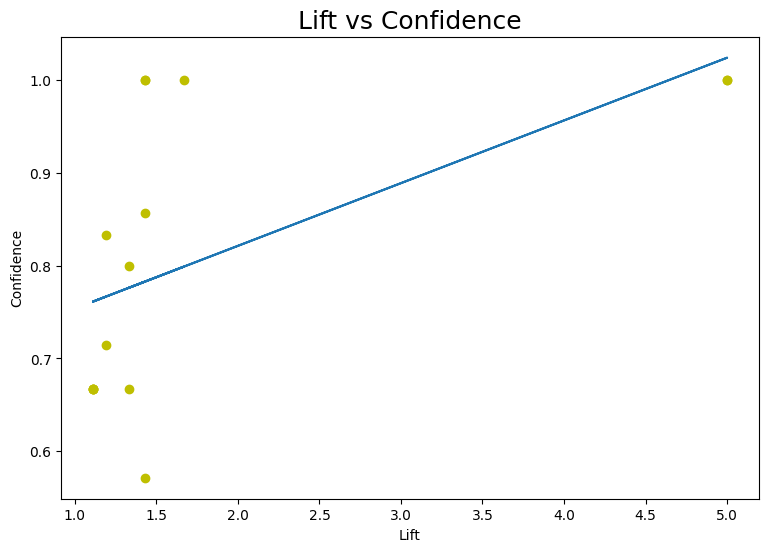

In [66]:
plt.figure(figsize=(9,6))
fit = np.polyfit(rules2['lift'], rules2['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules2['lift'], rules2['confidence'], 'yo', rules2['lift'],
fit_fn(rules2['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence', fontsize= 18)
plt.show()

#Association rules with 20% Support and 60% confidence
#With 20% Support

In [67]:
frequent_itemsets3 = apriori(movie_data, min_support=0.2,use_colnames=True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


##Support value gives us these information:
###Head 5

* 42 percent of 100 purchases are Sixth Sense
* 24 percent of 100 purchases are Gladiator
* 43 percent of 100 purchases are LOTR1
* 28 percent of 100 purchases are Harry Potter1
* 21 percent of 100 purchases are Patriot

#With 60% Confidence

In [68]:
rules3 = association_rules(frequent_itemsets3, metric='confidence', min_threshold=0.6)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


* Antecedent support variable tells us probability of antecedent products alone
* Consequents support variable tells us probability of consequents products alone
* The support value is the value of the two products (Antecedents and Consequents)
* Confidence is an indication of how often the rule has been found to be true.
* The ratio of the observed support to that expected if X and Y were independent.
* A leverage value of 0 indicates independence. Range will be [-1 1]
* A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [69]:
rules3.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
10,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
13,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4


#Lift Ratio > 1 is a good influential rule in selecting the associated transactions

In [70]:
lift3 = rules3[rules3.lift>1]
lift3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


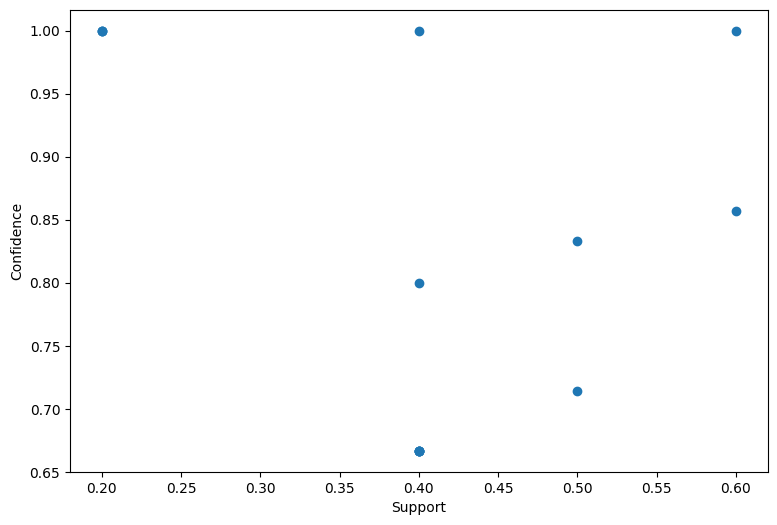

In [71]:
# Visualization of obtained rule
plt.figure(figsize=(9,6))
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [72]:
matrix3 = lift3.pivot('antecedents','consequents','lift')
matrix3

consequents,(Gladiator),(Sixth Sense),(Patriot),(LOTR2),(LOTR1),"(Gladiator, Patriot)","(Sixth Sense, Gladiator)"
antecedents,,,,,,,
(Sixth Sense),1.190476,NaN,1.111111,NaN,NaN,1.111111,NaN
(Gladiator),NaN,1.190476,1.428571,NaN,NaN,NaN,NaN
(Patriot),1.428571,1.111111,NaN,NaN,NaN,NaN,1.333333
(Green Mile),NaN,1.666667,NaN,NaN,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,5.0,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,NaN,5.0,NaN,NaN
"(Sixth Sense, Gladiator)",NaN,NaN,1.333333,NaN,NaN,NaN,NaN
"(Sixth Sense, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Patriot)",NaN,1.111111,NaN,NaN,NaN,NaN,NaN


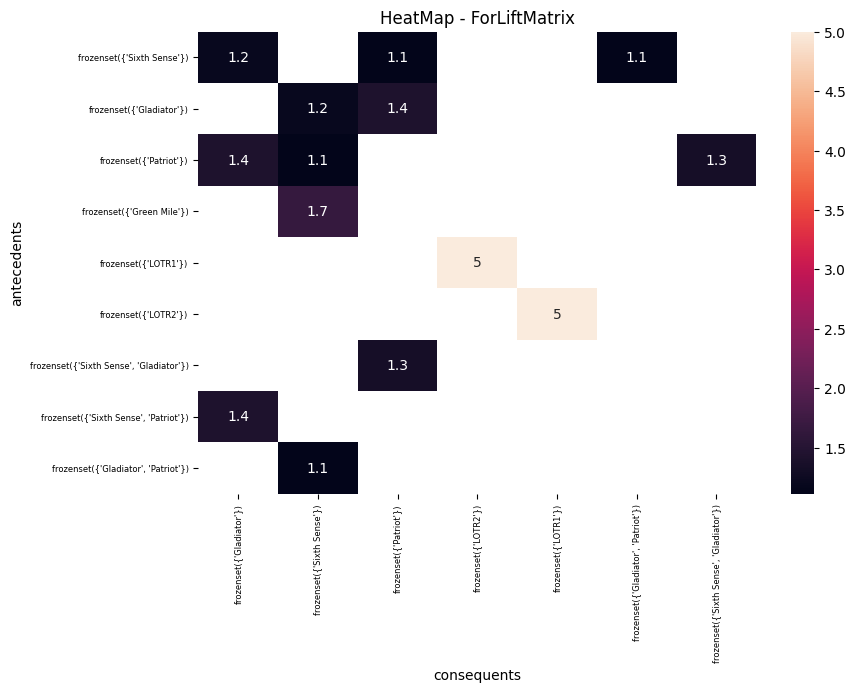

In [73]:
plt.figure(figsize=(9,6),dpi=100)
sns.heatmap(matrix3, annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0, fontsize= 6)
plt.xticks(rotation=90, fontsize= 6)
plt.show()

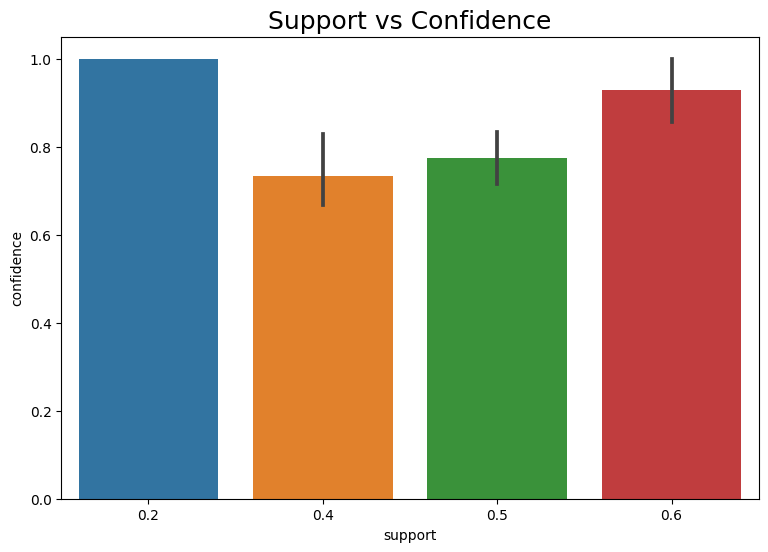

In [77]:
plt.figure(figsize=(9,6))
sns.barplot(x='support',y="confidence", data=lift3)
plt.title("Support vs Confidence", fontsize= 18)
plt.show()